In [61]:
# import our basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
%matplotlib inline

# Predicting housing prices in King County

King County in the USA is home to a major city, Seattle, as well as weathy smaller cities like Bellevue and Redmond (home to Microsoft and Nintendo USA). Our task in this dataset is to predict the selling price of a property. Likely zipcode and square feet (sqft) will be pretty predictive.

In [24]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

It appears price correlates best with `bedrooms`, `bathrooms`, `sqft_living`, and `grade`... and a bunch of other sqft features. It's unexpected to me that zipcode has no real correlations, but then python thinks it's a continous variable and it's actually categorical, so maybe that's part of the problem.

In [157]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(df.corr(),annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap='RdYlGn')
plt.show()

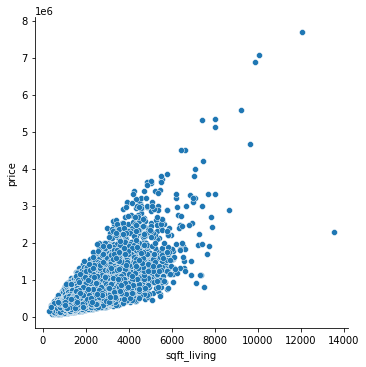

In [37]:
sns.relplot(x="sqft_living", y="price", data=df);

So, there appears to be a pretty neat linear correlation between living space and price.

## Baseline model
For a baseline regression model, we'll just take our strongest single feature (sqft_living) and create a single feature regressor to see how that does.

In [219]:
x = np.array(df['sqft_living']).reshape(-1, 1) # features
y = np.array(df['price']) # what to predict

In [220]:
# Train and Test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

In [221]:
# Linear regression
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest)

In [222]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ytest, pred))

Coefficients: 
 [273.80181792]
Mean squared error: 72169122334.17
Coefficient of determination: 0.50


## (Naively) Improving from Baseline
For this next try we're just going to add more features

In [223]:
x = df[['id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long']] # features
y = np.array(df['price']) # what to predict

In [224]:
# Train and Test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

In [225]:
# Linear regression
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest)

In [226]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(ytest, pred))

Coefficients: 
 [-1.51100544e-06 -2.76463316e+04  3.80546408e+04  1.47712945e+02
  1.57464933e-02  7.56365137e+03  6.20562913e+05  5.58010431e+04
  1.03257750e+05  2.60424813e+01 -2.83821099e+03  3.45247776e+00
 -5.85826890e+02  6.07503395e+05 -1.92523010e+05]
Mean squared error: 45358836508.70
Coefficient of determination: 0.69
